Empty DataFrame
Columns: [Engine, engine_config_id_x, run_id, Model, Mean Input Tokens, Mean Output Tokens, Concurrent Requests, Completed Requests, Duration (s), Request Throughput (req/min), Output Token Throughput (tok/s), Output Token Throughput per User (tok/s), Mean End to End Latency (s), Mean TTFT (ms), P95 TTFT (ms), Mean Inter Token Latency (ms), P95 Inter Token Latency (ms), attn_input_reshape_min, attn_input_reshape_max, attn_input_reshape_mean, attn_input_reshape_median, attn_input_reshape_std, attn_kv_cache_save_min, attn_kv_cache_save_max, attn_kv_cache_save_mean, attn_kv_cache_save_median, attn_kv_cache_save_std, attn_prefill_min, attn_prefill_max, attn_prefill_mean, attn_prefill_median, attn_prefill_std, attn_decode_min, attn_decode_max, attn_decode_mean, attn_decode_median, attn_decode_std, attn_output_reshape_min, attn_output_reshape_max, attn_output_reshape_mean, attn_output_reshape_median, attn_output_reshape_std, embed_min, embed_max, embed_mean, embed_median, emb

Text(0, 0.5, 'Time (seconds)')

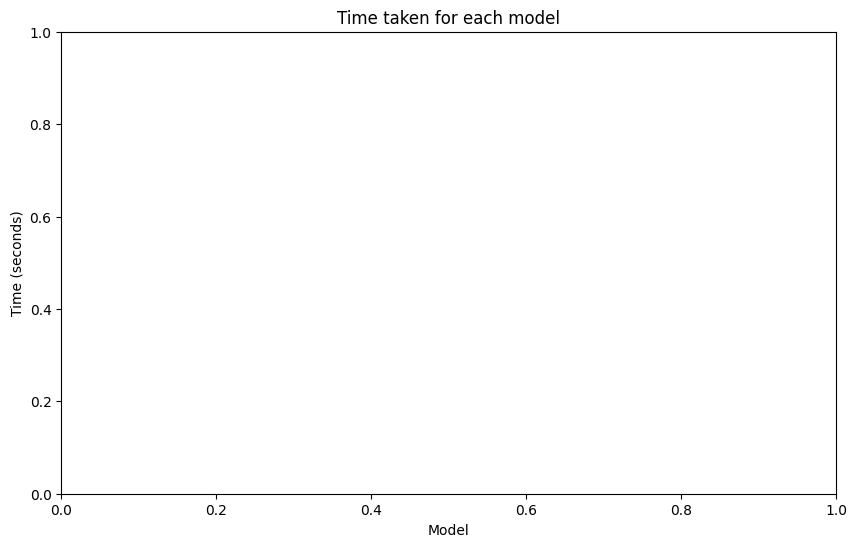

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df_summary = pd.read_csv('/home/ditto-bud/results/meta-llama--Meta-Llama-3.1-8B-Instruct/summary.csv')
# df_engine = pd.read_csv('/home/ditto-bud/results/meta-llama--Meta-Llama-3.1-8B-Instruct/engine_config.csv')
df_system = pd.read_csv('/home/ditto-bud/results/meta-llama--Meta-Llama-3.1-8B-Instruct/system_metrics.csv')
# df = pd.merge(df_summary, df_engine, on='engine_config_id', how='inner')
df = pd.merge(df_summary, df_system, on='run_id', how='inner')

# Display the first few rows of the dataframe
filtered_df = df[df['Mean Input Tokens'] == 100]

print(filtered_df.head())

#print the average output token throughput for each model
print(df.groupby('Concurrent Requests')['Output Token Throughput (tok/s)'].mean())

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='run_id', y='Output Token Throughput (tok/s)', data=filtered_df)
plt.title('Time taken for each model')
plt.xlabel('Model')
plt.ylabel('Time (seconds)')

Text(0, 0.5, 'CPU Utilization (%)')

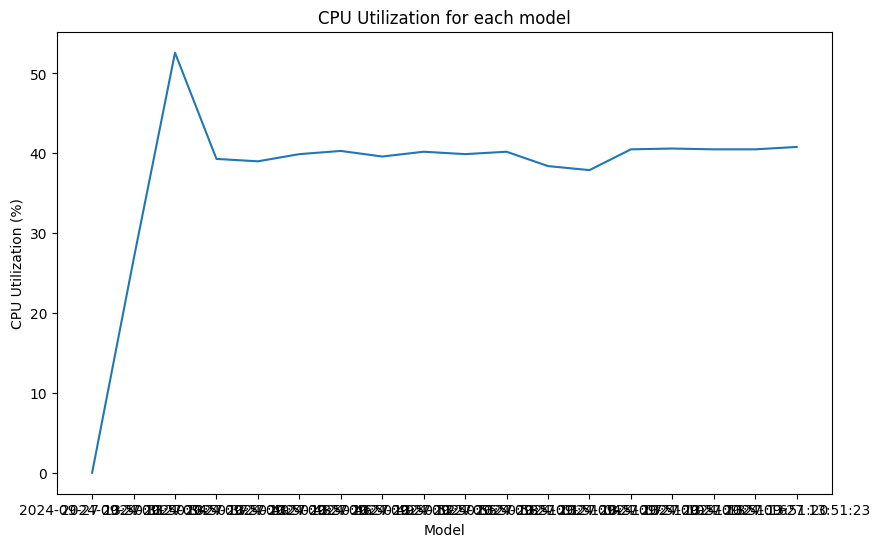

In [4]:

#plot resource usage for each model against each run_id
util_df = df[['run_id', 'cpu_utilization']].groupby('run_id').mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x='timestamp', y='cpu_utilization', data=df)
plt.title('CPU Utilization for each model')
plt.xlabel('Model')
plt.ylabel('CPU Utilization (%)')
